In [3]:
import torch
# tensor operator cat
t = torch.ones((2,3))
t_0 = torch.cat([t, t], dim = 0)
t_1 = torch.cat([t, t], dim = 1)

print(" tensor shape {}\n tensor_0 shape {}\n tensor_1 shape {}."
      .format(t.shape, t_0.shape, t_1.shape))


 tensor shape torch.Size([2, 3])
 tensor_0 shape torch.Size([4, 3])
 tensor_1 shape torch.Size([2, 6]).


In [6]:
# tensor operator stack
# 相对于cat的拼接，stack的拼接会增加维度。
t_0 = torch.stack([t, t, t], dim = 2)
t_1 = torch.stack([t, t, t], dim = 0)

print(" tensor_0 shape {}\n tensor_1 shape {}\n".
      format(t_0.shape, t_1.shape))

 tensor_0 shape torch.Size([2, 3, 3])
 tensor_1 shape torch.Size([3, 2, 3])



In [10]:
# tensor operator chunk
# 将张量按照维度 dim 进行平均切分。若不能整除，则最后一份张量小于其他张量。

t = torch.ones((2, 7))
chunks_of_t = torch.chunk(t, dim = 1, chunks =3)
for idx, tmp_t in enumerate(chunks_of_t):
    print("idx : {}, tensor_shape{}".
          format(idx, tmp_t.shape))

idx : 0, tensor_shapetorch.Size([2, 3])
idx : 1, tensor_shapetorch.Size([2, 3])
idx : 2, tensor_shapetorch.Size([2, 1])


In [13]:
# tensor operator split
# 将张量按照维度 dim 进行平均切分。可以指定每一个分量的切分长度。
# tensor: 要切分的张量
# split_size_or_sections: 为 int 时，表示每一份的长度，如果不能被整除，则最后一份张量小于其他张量；为 list 时，按照 list 元素作为每一个分量的长度切分。如果 list 元素之和不等于切分维度 (dim) 的值，就会报错。
# dim: 要切分的维度

list_of_tensors = torch.split(t, [2,3,2], dim = 1)
for idx, tmp_t in enumerate(list_of_tensors):
    print("idx : {}, tensor_shape : {}"
          .format(idx, tmp_t.shape))

# 如果不输入list, 会报错
#list_of_tensors = torch.split(t, dim = 1)
#for idx, tmp_t in enumerate(list_of_tensors):
#    print("idx : {}, tensor_shape : {}"
#          .format(idx, tmp_t.shape))

idx : 0, tensor_shape : torch.Size([2, 2])
idx : 1, tensor_shape : torch.Size([2, 3])
idx : 2, tensor_shape : torch.Size([2, 2])


In [15]:
# tensor opertor masek_selet()
# 按照 mask 中的 True 进行索引拼接得到一维张量返回。
# mask 的形状需要和input相同

t =  torch.randint(0, 9, size = (3, 3))
mask = t.le(5)

t_select = torch.masked_select(t, mask)
print("t:\n{}\nmask:\n{}t_select:\n{}"
      .format(t, mask, t_select))

t:
tensor([[8, 0, 5],
        [4, 4, 7],
        [6, 1, 2]])
mask:
tensor([[False,  True,  True],
        [ True,  True, False],
        [False,  True,  True]])t_select:
tensor([0, 5, 4, 4, 1, 2])


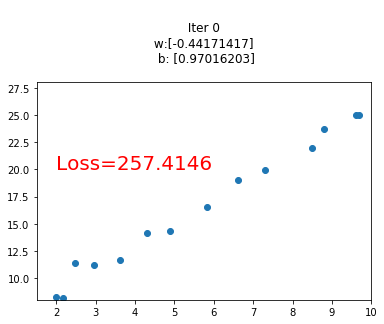

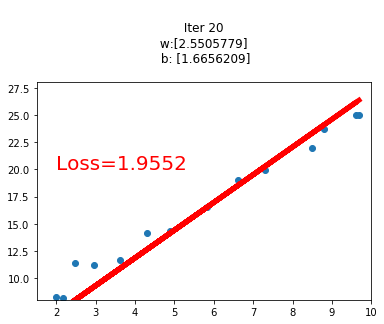

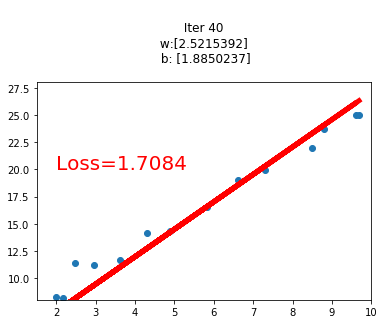

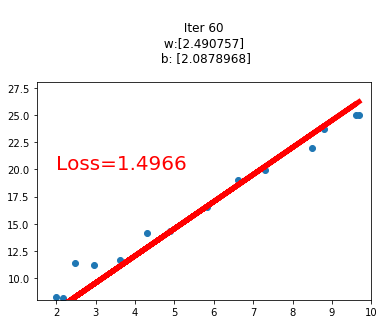

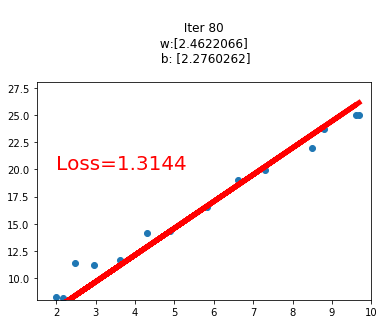

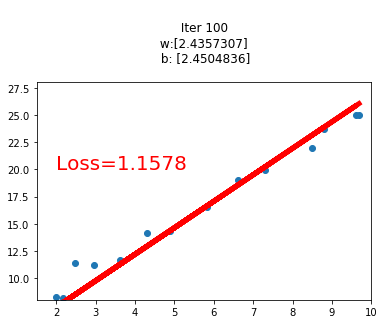

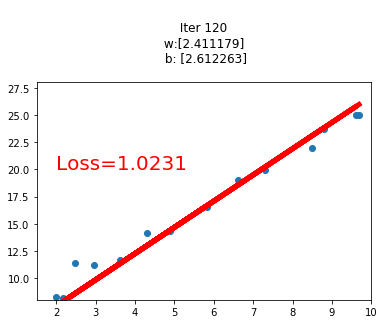

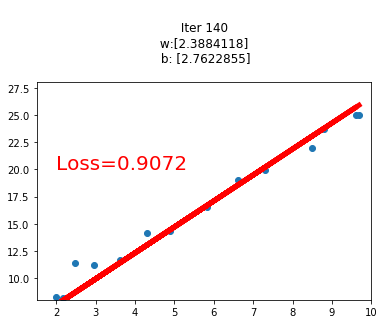

In [29]:
#  线性回归
import matplotlib.pyplot as plt
torch.manual_seed(19)

lr = 0.01 #learning rate

x = torch.rand(20, 1) * 10 #range from 0 to 10
y = 2 * x + (5 + torch.randn(20, 1)) # add noie

w = torch.randn((1), requires_grad = True)
b = torch.randn((1), requires_grad = True)

for iter in range(1000):
    wx = torch.mul(w, x)
    y_pre = torch.add(wx, b)
    
    loss = (0.5 * (y - y_pre) ** 2).mean()

    # print("iter : {}, loss : {}".format(iter, loss.data.numpy()))
    
    loss.backward()
    
    b.data.sub_(lr * b.grad)
    w.data.sub_(lr * w.grad)
    
    # 梯度需要清零
    b.grad.zero_()
    w.grad.zero_()
    
    if iter % 20 == 0:
        
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), y_pre.data.numpy(), 'r-', lw = 5)
        plt.text(2, 20, 'Loss=%.4f' % loss.data.numpy(), 
                  fontdict={'size': 20, 'color':  'red'})
        plt.xlim(1.5, 10)
        plt.ylim(8, 28)
        
        plt.title('\n Iter {} \n w:{} \n b: {}\n'.
                  format(iter, w.data.numpy(), b.data.numpy()))
        plt.pause(0.5)
        
        if loss.data.numpy() < 1:
            break
